# Datos de EPM

## Librerias


In [238]:
# Librarias para procesar datos
import pandas as pd
import numpy as np

from datetime import datetime
import urllib.request


# Librearías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librerias para modelo ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Comprobar la estacionariedad de la serie
from statsmodels.tsa.stattools import adfuller

import matplotlib.dates as mdates

from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

from utils.DataPreparationRNN import create_dataset


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import math

## Cargando datos

In [239]:
df_ = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)


In [240]:
df = pd.read_parquet("datos_procesados/df_energia_epm.parquet")
df.index = df['date']

In [241]:
df.head()

,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva,date
date,,,,,
2020-02-16,4948.0,0.0,0.0,1382.0,2020-02-16
2020-02-17,14400.0,0.0,0.0,7072.0,2020-02-17
2020-02-18,14896.0,0.0,0.0,7640.0,2020-02-18
2020-02-19,14976.0,0.0,0.0,7800.0,2020-02-19
2020-02-20,16104.0,0.0,0.0,8376.0,2020-02-20


In [242]:
reactiva_inductiva = df['reactiva_inductiva']
reactiva_inductiva

date
2020-02-16     1382.0
2020-02-17     7072.0
2020-02-18     7640.0
2020-02-19     7800.0
2020-02-20     8376.0
               ...   
2024-09-25    10616.0
2024-09-26    11336.0
2024-09-27    11152.0
2024-09-28    10888.0
2024-09-29    10112.0
Name: reactiva_inductiva, Length: 1668, dtype: float16

In [243]:
t = ''
j = 1
for i in list(reactiva_inductiva):
    t = t+ f" ({j},{i})"
    j+=1
t

' (1,1382.0) (2,7072.0) (3,7640.0) (4,7800.0) (5,8376.0) (6,7248.0) (7,6356.0) (8,6372.0) (9,7604.0) (10,7964.0) (11,7540.0) (12,7364.0) (13,6984.0) (14,6724.0) (15,4940.0) (16,7572.0) (17,7676.0) (18,7932.0) (19,7268.0) (20,7400.0) (21,6924.0) (22,4876.0) (23,7688.0) (24,8176.0) (25,7768.0) (26,7944.0) (27,7508.0) (28,7616.0) (29,5844.0) (30,7092.0) (31,6884.0) (32,7468.0) (33,6992.0) (34,6372.0) (35,6476.0) (36,5724.0) (37,6872.0) (38,6668.0) (39,6752.0) (40,6768.0) (41,6504.0) (42,6188.0) (43,5376.0) (44,6388.0) (45,6776.0) (46,6672.0) (47,7508.0) (48,6980.0) (49,5796.0) (50,6596.0) (51,7164.0) (52,7504.0) (53,7140.0) (54,6948.0) (55,6740.0) (56,6972.0) (57,6008.0) (58,7296.0) (59,6968.0) (60,6760.0) (61,7428.0) (62,6256.0) (63,6432.0) (64,5172.0) (65,7128.0) (66,6780.0) (67,6976.0) (68,7068.0) (69,7056.0) (70,6628.0) (71,6932.0) (72,7276.0) (73,8072.0) (74,7700.0) (75,6556.0) (76,7600.0) (77,5996.0) (78,6264.0) (79,7804.0) (80,8280.0) (81,7208.0) (82,7468.0) (83,7744.0) (84,8132.0)

In [244]:
result = adfuller(reactiva_inductiva.dropna())
print('ADF Statistic is: %f' % result[0])
print('p-value is: %f' % result[1])

ADF Statistic is: -2.512916
p-value is: 0.112363


In [245]:
289+50




339

In [246]:
# ## Gráficando la serie 
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# N = len(df_.value)
# umbral = 1.96 / np.sqrt(N)
# fig, axes = plt.subplots(3,2, sharex=True)
# axes[0,0].plot(df_.value); axes[0,0].set_title('Serie Original')
# plot_acf(df_.value, ax=axes[0,1])
# axes[0, 1].hlines([umbral, -umbral], xmin=0, xmax=len(df_.value), colors='red', linestyles='dashed')
# axes[0, 1].set_title('ACF con Umbral de Significancia')

# plt.show()

In [261]:
df_ = pd.read_parquet("datos_procesados/df_energia_epm.parquet")
df_.to_csv("datos_procesados/df_energia_epm.csv")

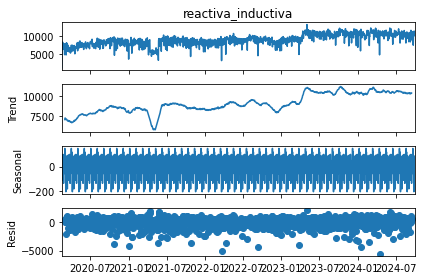

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose


reactiva_inductiva.index = pd.to_datetime(reactiva_inductiva.index)

# Prueba con diferentes periodos para observar la estacionalidad
# Por ejemplo, para detectar estacionalidad semanal (m=7)
decomposition = seasonal_decompose(reactiva_inductiva, model='additive', period=31)
decomposition.plot()
plt.show()

In [248]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import acf, pacf
import pandas as pd

# Suponiendo que reactiva_inductiva es un DataFrame o Serie de pandas
# Crear el gráfico de la serie original
fig_original = px.line(reactiva_inductiva, title='Serie Original')
fig_original.update_xaxes(title_text='Tiempo')
fig_original.update_yaxes(title_text='Valor')

N = len(reactiva_inductiva)
umbral = 1.96 / np.sqrt(N)

# Calcular los valores de ACF
acf_values = acf(reactiva_inductiva, fft=True)
lags = list(range(len(acf_values)))

# Crear el gráfico de ACF
fig_acf = go.Figure()
fig_acf.add_trace(go.Bar(x=lags, y=acf_values, name='ACF'))
fig_acf.update_layout(title='Función de Autocorrelación (ACF)')
fig_acf.update_xaxes(title_text='Lags')
fig_acf.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")


# pacf
pacf_values = pacf(reactiva_inductiva, nlags=40)
lags_pacf = list(range(len(pacf_values)))
# Crear el gráfico de PACF
fig_pacf = go.Figure()
fig_pacf.add_trace(go.Bar(x=lags_pacf, y=pacf_values, name='PACF'))
fig_pacf.update_layout(title='Función de Autocorrelación Parcial (PACF)')
fig_pacf.update_xaxes(title_text='Lags')
fig_pacf.update_yaxes(title_text='Autocorrelación Parcial')
# Añadir las líneas de umbral de significancia
fig_pacf.add_shape(type="line", x0=0, y0=umbral, x1=len(pacf_values), y1=umbral, line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_pacf.add_shape(type="line", x0=0, y0=-umbral, x1=len(pacf_values), y1=-umbral, line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Crear el gráfico de Differenciacion
reactiva_inductiva_diff = reactiva_inductiva.diff()
fig_original_diff = px.line(reactiva_inductiva_diff, title='Serie Original Diferenciada')
fig_original_diff.update_xaxes(title_text='Tiempo')
fig_original_diff.update_yaxes(title_text='Valor')

# Gráfico de ACF 
acf_values_diff = acf(reactiva_inductiva_diff.dropna(), fft=True)
lags_diff = list(range(len(acf_values_diff)))
fig_acf_diff = go.Figure()
fig_acf_diff.add_trace(go.Bar(x=lags_diff, y=acf_values_diff, name='ACF'))
fig_acf_diff.update_layout(title='Función de Autocorrelación (ACF) Diferenciada')
fig_acf_diff.update_xaxes(title_text='Lags')
fig_acf_diff.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf_diff.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf_diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")


# pacf
pacf_diff = pacf(reactiva_inductiva_diff, nlags=40)
lags_pacf_diff = list(range(len(pacf_diff)))
# Crear el gráfico de PACF
fig_pacf_diff = go.Figure()
fig_pacf_diff.add_trace(go.Bar(x=lags_pacf_diff, y=pacf_diff, name='PACF'))
fig_pacf_diff.update_layout(title='Función de Autocorrelación Parcial (PACF)')
fig_pacf_diff.update_xaxes(title_text='Lags')
fig_pacf_diff.update_yaxes(title_text='Autocorrelación Parcial')
# Añadir las líneas de umbral de significancia
fig_pacf_diff.add_shape(type="line", x0=0, y0=umbral, x1=len(pacf_diff), y1=umbral, line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_pacf_diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(pacf_diff), y1=-umbral, line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Crear el gráfico de la segunda Differenciacion
reactiva_inductiva_2diff = reactiva_inductiva.diff().diff()
fig_original_2diff = px.line(reactiva_inductiva_2diff, title='Serie Original Diferenciada')
fig_original_2diff.update_xaxes(title_text='Tiempo')
fig_original_2diff.update_yaxes(title_text='Valor')

# Gráfico de ACF 
acf_values_2diff = acf(reactiva_inductiva_2diff.dropna(), fft=True)
lags_2diff = list(range(len(acf_values_2diff)))
fig_acf_2diff = go.Figure()
fig_acf_2diff.add_trace(go.Bar(x=lags_2diff, y=acf_values_2diff, name='ACF'))
fig_acf_2diff.update_layout(title='Función de Autocorrelación (ACF) segunda Diferenciación')
fig_acf_2diff.update_xaxes(title_text='Lags')
fig_acf_2diff.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf_2diff.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf_2diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Mostrar ambos gráficos
fig_original.show()
fig_acf.show()
fig_pacf.show()
fig_original_diff.show()
fig_acf_diff.show()
fig_pacf_diff.show()
fig_original_2diff.show()
fig_acf_2diff.show()


In [249]:
result_diff = adfuller(reactiva_inductiva_diff.dropna())
print('ADF Statistic is: %f' % result_diff[0])
print('p-value is: %f' % result_diff[1])

result_2diff = adfuller(reactiva_inductiva_2diff.dropna())
print('ADF Statistic is: %f' % result_2diff[0])
print('p-value is: %f' % result_2diff[1])

ADF Statistic is: -10.202827
p-value is: 0.000000
ADF Statistic is: -17.376236
p-value is: 0.000000


In [250]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import acf
import numpy as np

# Suponiendo que reactiva_inductiva es un DataFrame o Serie de pandas
# Calcular los valores de ACF
acf_values = acf(reactiva_inductiva, fft=True)
lags = list(range(len(acf_values)))

# Calcular el umbral de significancia
N = len(reactiva_inductiva)
umbral = 1.96 / np.sqrt(N)

# Crear el gráfico de ACF con umbral
fig_acf = go.Figure()

# Añadir las barras de autocorrelación
fig_acf.add_trace(go.Bar(x=lags, y=acf_values, name='ACF'))

# Añadir las líneas de umbral de significancia
fig_acf.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Configuración de títulos y etiquetas
fig_acf.update_layout(title='Función de Autocorrelación (ACF) con Umbral de Significancia')
fig_acf.update_xaxes(title_text='Lags')
fig_acf.update_yaxes(title_text='Autocorrelación')

# Mostrar el gráfico
fig_acf.show()


## Arima

In [251]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA  # Nota: en versiones recientes, se usa `tsa.arima.model`
import pmdarima as pm

train = reactiva_inductiva[:'2023']
test = reactiva_inductiva['2024':]

In [252]:
reactiva_inductiva.values

array([ 1382.,  7072.,  7640., ..., 11152., 10888., 10112.], dtype=float16)

In [253]:
# model = pm.auto_arima(
#                 reactiva_inductiva.values, 
#                 seasonal=True,   # No Seasonality
#                 suppress_warnings=False, 
#                 stepwise=False,
#                 m=31
#         )
# print(model)

In [254]:
model = pm.auto_arima(reactiva_inductiva.values, 
                      start_p=1, start_q=1,
                      test='adf',       # Use adftest to find optimal 'd'
                      max_p=50, max_q=50, # Maximum p and q
                      m=7,              # Frequency of series
                      d=1,           # Let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
        )
print(model.summary())

/home/javier/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (7) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27291.402, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27988.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27715.341, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27326.353, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27986.666, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27291.084, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27614.420, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27278.213, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27548.455, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27254.179, Time=1.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27478.877, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=27221.671, Time=0.91 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27387.565, Time=0.22 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=27024.933, Time=1.27 sec
 ARIMA(6,1,0)(0,0,0

In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1668
Model:               SARIMAX(7, 1, 0)   Log Likelihood              -13503.541
Date:                Thu, 14 Nov 2024   AIC                          27023.082
Time:                        06:31:07   BIC                          27066.432
Sample:                             0   HQIC                         27039.146
                               - 1668                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7025      0.018    -39.682      0.000      -0.737      -0.668
ar.L2         -0.6133      0.024    -25.160      0.000      -0.661      -0.565
ar.L3         -0.5630      0.028    -20.151      0.000      -0.618      -0.508
ar.L4         -0.5260      0.030    -17.701      0.000      -0.584      -0.468
ar.L5         -0.4704      0.027    -17.612      0.000      -0.523      -0.418
ar.L6         -0.3839      0.024    -15.865      0.000      -0.431      -0.336
ar.L7          0.0813      0.024      3.380      0.001       0.034       0.128
sigma2      6.122e+05   1.09e+04     56.281      0.000    5.91e+05    6.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              2651.55
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.96
Prob(H) (two-sided):                  0.04   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [269]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Nueva importación

# Importar los dat

# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
p, d, q = model.order
model = ARIMA(train, order=(7, 1, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()


AttributeError: 'Sequential' object has no attribute 'order'

Panel Superior Izquierdo - Residuos Estandarizados

Muestra los residuos estandarizados del modelo a lo largo del tiempo.

Los residuos están aproximadamente centrados en cero y no muestran patrones evidentes, lo cual es una buena señal de que el modelo está capturando bien la estructura de la serie temporal.
Aunque hay algunos valores atípicos (picos hacia arriba y hacia abajo), en general, los residuos parecen estar distribuidos de forma aleatoria.


Panel Superior Derecho - Histograma de Residuos con Densidad Estimada

Este gráfico presenta el histograma de los residuos junto con la densidad estimada de Kernel (KDE) y la curva teórica de una distribución normal  N(0,1)
N(0,1).

La forma de la distribución de los residuos se asemeja a una distribución normal, aunque las colas son un poco más gruesas, lo que indica que hay más valores extremos de lo que se esperaría en una distribución perfectamente normal.

La curva KDE (naranja) sigue de cerca la curva normal (verde), lo cual es positivo, pero las colas indican que los residuos podrían tener un comportamiento ligeramente no normal.

Panel Inferior Izquierdo - Gráfico Q-Q (Quantile-Quantile)

Este gráfico compara los cuantiles de los residuos con los cuantiles teóricos de una distribución normal.

Si los residuos fueran perfectamente normales, los puntos deberían alinearse con la línea roja.

En este caso, los puntos están bastante alineados con la línea, aunque hay desviaciones en las colas (especialmente en los extremos), lo cual sugiere que los residuos tienen colas más gruesas de lo normal. Esto significa que existen valores extremos que no siguen una distribución normal perfecta.

Panel Inferior Derecho - Correlograma de Residuos

Muestra la autocorrelación de los residuos en diferentes retardos (lags).
En un buen modelo ARIMA/SARIMA, no debería haber autocorrelación significativa en los residuos, es decir, los puntos deberían estar dentro de las bandas de confianza.
En este gráfico, todos los puntos están dentro del intervalo de confianza, lo cual indica que no hay autocorrelación significativa en los residuos. Esto es una buena señal, ya que sugiere que el modelo ha capturado adecuadamente la dependencia temporal de la serie y que los residuos se comportan como ruido blanco.

Conclusión General

Normalidad de los Residuos: Los residuos son aproximadamente normales, aunque con algunas colas gruesas, lo que podría ser aceptable dependiendo de la aplicación.
Autocorrelación de los Residuos: No se observa autocorrelación significativa en los residuos, lo que indica que el modelo ha capturado adecuadamente la estructura de autocorrelación de la serie temporal.
Valores Atípicos: Algunos valores extremos en los residuos podrían indicar anomalías en la serie original o variabilidad no completamente capturada por el modelo.
En general, estos diagnósticos sugieren que el modelo ajustado es razonablemente bueno, ya que los residuos no presentan autocorrelación y son aproximadamente normales. Este modelo puede considerarse adecuado para predicciones, aunque podrías explorar ajustes adicionales si los valores atípicos o las colas gruesas representan un problema en el contexto de tu análisis.

In [270]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     reactiva_inductiva   No. Observations:                 1403
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11448.618
Date:                Fri, 15 Nov 2024   AIC                          22903.237
Time:                        01:01:27   BIC                          22918.974
Sample:                             0   HQIC                         22909.119
                               - 1403                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1866      0.024      7.913      0.000       0.140       0.233
ma.L1         -0.8851      0.014    -61.309      0.000      -0.913      -0.857
sigma2      7.195e+05   1.53e+04     47.103      0.000     6.9e+05    7.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):              1840.59
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.10
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Errores con train

In [271]:
predicciones_train = model_fit.predict(start=0, end=len(train)-1)

In [272]:

mae = mean_absolute_error(train, predicciones_train)
print(f'MAE: {mae}')

mse = mean_squared_error(train, predicciones_train)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

MSLE = np.mean((np.log1p(train) - np.log1p(predicciones_train))**2)
print(f'MSLE: {MSLE}')

r2 = r2_score(train, predicciones_train)
print(f'R2: {r2}')

r1 = stats.pearsonr(train, predicciones_train)
print(f'Pearson: {r1}')

mape = np.mean(np.abs((train - predicciones_train) / train)) * 100
print(f'MAPE: {mape}')

medae = np.median(np.abs(train - predicciones_train))
print(f'MedAE: {medae}')

max_error = np.max(np.abs(train - predicciones_train))
print(f'Max Error: {max_error}')

explained_variance = r2_score(train, predicciones_train)
print(f'Explained Variance: {explained_variance}')



# Realizar predicciones


MAE: 602.6230944328314
RMSE: 857.200557745501
MSLE: 0.05187429555805585
R2: 1.0
Pearson: PearsonRResult(statistic=0.7808790725781196, pvalue=1.4266665706997425e-288)
MAPE: 7.637347403475199
MedAE: 448.6981318797061
Max Error: 5978.376232281025
Explained Variance: 1.0


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square

/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square



In [273]:
fig_train = go.Figure()
fig_train.add_trace(go.Line(x=train.index, y=train, name='Real'))
fig_train.add_trace(go.Line(x=train.index, y=predicciones_train, name='Predicción'))
fig_train.update_layout(
    title='Predicciones en Datos de Entrenamiento',
    xaxis_rangeslider_visible=True
)
fig_train.show()

/home/javier/.local/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [274]:
predictions_test = model_fit.predict(start=0, end=len(test)-1)
#model_fit.forecast(steps=len(test))

In [275]:
predictions_test.index = test.index

In [276]:
predictions_test

date
2024-01-01       0.000000
2024-01-02    1093.623768
2024-01-03    4297.833553
2024-01-04    5312.230331
2024-01-05    5896.411329
                 ...     
2024-09-25    7927.225590
2024-09-26    8567.193569
2024-09-27    8620.347955
2024-09-28    8677.734033
2024-09-29    8559.815045
Name: predicted_mean, Length: 265, dtype: float64

In [277]:
test

date
2024-01-01     6936.0
2024-01-02    11200.0
2024-01-03    10304.0
2024-01-04    10664.0
2024-01-05    10088.0
               ...   
2024-09-25    10616.0
2024-09-26    11336.0
2024-09-27    11152.0
2024-09-28    10888.0
2024-09-29    10112.0
Name: reactiva_inductiva, Length: 265, dtype: float16

In [278]:
fig_test = go.Figure()
fig_test.add_trace(go.Line(x=predictions_test.index, y=predictions_test, name='Predicción'))
fig_test.add_trace(go.Line(x=test.index, y=test, name='test'))
fig_test.update_layout(
    title='Prediciones en Datos de Test',
    xaxis_rangeslider_visible=True
)
fig_test.show()

In [279]:

mae = mean_absolute_error(test, predictions_test)
print(f'MAE: {mae}')

mse = mean_squared_error(test, predictions_test)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

MSLE = np.mean((np.log1p(test) - np.log1p(predictions_test))**2)
print(f'MSLE: {MSLE}')

r2 = r2_score(test, predictions_test)
print(f'R2: {r2}')

r1 = stats.pearsonr(test, predictions_test)
print(f'r1-Pearson: {r1}')

mape = np.mean(np.abs((test - predictions_test) / test)) * 100
print(f'MAPE: {mape}')

medae = np.median(np.abs(test - predictions_test))
print(f'MedAE: {medae}')

max_error = np.max(np.abs(test - predictions_test))
print(f'Max Error: {max_error}')

explained_variance = r2_score(test, predictions_test)
print(f'Explained Variance: {explained_variance}')

MAE: 2928.2441231685743
RMSE: 3158.678463507421
MSLE: 0.4350586377826292
R2: 1.0
r1-Pearson: PearsonRResult(statistic=0.03940413224268832, pvalue=0.523038549129432)
MAPE: 27.64225871550345
MedAE: 2790.065000478622
Max Error: 10106.376232281025
Explained Variance: 1.0


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square

/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square



In [280]:
test

date
2024-01-01     6936.0
2024-01-02    11200.0
2024-01-03    10304.0
2024-01-04    10664.0
2024-01-05    10088.0
               ...   
2024-09-25    10616.0
2024-09-26    11336.0
2024-09-27    11152.0
2024-09-28    10888.0
2024-09-29    10112.0
Name: reactiva_inductiva, Length: 265, dtype: float16

In [281]:
dias_futuro = 31
futuro = model_fit.forecast(steps=dias_futuro)
ultima_fecha = test.index[-1]
nuevas_fechas = pd.date_range(ultima_fecha, periods=dias_futuro, freq='D')
futuro.index = nuevas_fechas

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [282]:
fig_train = go.Figure()
fig_train.add_trace(go.Line(x=test["2024-09-01":].index, y=test, name='Real'))
fig_train.add_trace(go.Line(x=futuro.index, y=futuro, name='Predicción'))
fig_train.update_layout(
    title='Predicciones en Datos de Entrenamiento',
    xaxis_rangeslider_visible=True
)
fig_train.show()

/home/javier/.local/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [283]:
predictions_futuro = model_fit.predict(start=0, end=len(futuro)-1)

In [284]:
predictions_futuro.index = futuro.index

In [285]:
fig_train = go.Figure()
fig_train.add_trace(go.Line(x=futuro.index, y=futuro, name='Real'))
fig_train.add_trace(go.Line(x=predictions_futuro.index, y=predictions_futuro, name='Predicción'))
fig_train.update_layout(
    title='Predicciones en Datos de Entrenamiento',
    xaxis_rangeslider_visible=True
)
fig_train.show()

In [123]:
furuto

1403     9578.346879
1404     8840.988143
1405    10489.248719
1406    10804.257798
1407     9981.119163
1408    10054.444478
1409    10340.865508
1410     9806.497774
1411     9498.745354
1412    10253.768290
1413    10405.599314
1414    10053.718220
1415    10083.095821
1416    10185.093566
1417     9930.666304
1418     9802.394320
1419    10149.056530
1420    10223.630743
1421    10074.460128
1422    10085.603506
1423    10118.448943
1424     9996.897012
1425     9943.445500
1426    10103.006818
1427    10140.238946
1428    10077.684154
1429    10081.568017
1430    10089.994464
1431    10031.704269
1432    10009.397794
Name: predicted_mean, dtype: float64

## Otros modelos Arima

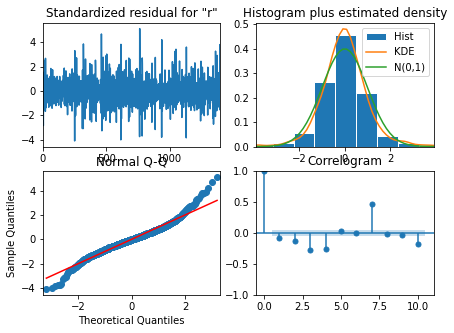

In [28]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(3, 2, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

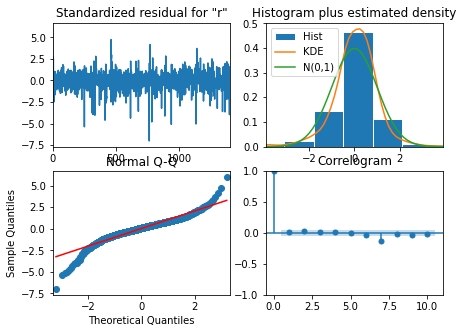

In [29]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(7, 1, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

In [30]:
model = pm.auto_arima(reactiva_inductiva, 
                      start_p=1, start_q=1,
                      test='adf',       # Use adftest to find optimal 'd'
                      max_p=10, max_q=10, # Maximum p and q
                      m=31,              # Frequency of series
                      d=1,           # Let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
        )
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27291.402, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27988.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27715.341, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27326.353, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27986.666, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27291.084, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27614.420, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27278.213, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27548.455, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27254.179, Time=1.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27478.877, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=27221.671, Time=0.84 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27387.565, Time=0.30 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=27024.933, Time=0.96 sec
 ARIMA(6,1,0)(0,0,0

In [31]:
predictions = model_fit.forecast(30)

In [32]:
test.iloc[30]

10700.0

In [33]:
predictions

1403     9578.346879
1404     8840.988143
1405    10489.248719
1406    10804.257798
1407     9981.119163
1408    10054.444478
1409    10340.865508
1410     9806.497774
1411     9498.745354
1412    10253.768290
1413    10405.599314
1414    10053.718220
1415    10083.095821
1416    10185.093566
1417     9930.666304
1418     9802.394320
1419    10149.056530
1420    10223.630743
1421    10074.460128
1422    10085.603506
1423    10118.448943
1424     9996.897012
1425     9943.445500
1426    10103.006818
1427    10140.238946
1428    10077.684154
1429    10081.568017
1430    10089.994464
1431    10031.704269
1432    10009.397794
Name: predicted_mean, dtype: float64

RMSE: 1009.3414390734199
MAE: 783.8638375186605


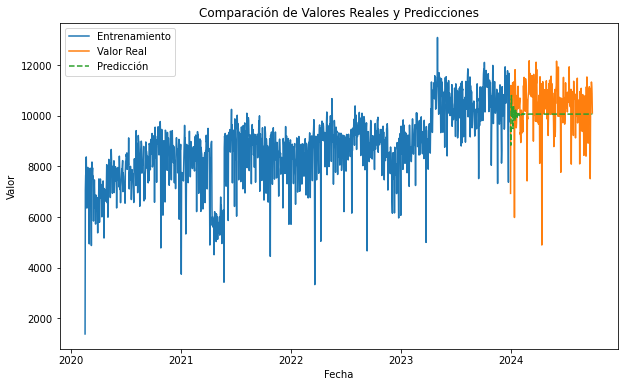

In [34]:
predictions = model_fit.forecast(steps=len(test))
comparison_df = pd.DataFrame({
    'Fecha': test.index,
    'Valor Real': test.values,
    'Predicción': predictions
}).set_index('Fecha')

# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

In [35]:
train

date
2020-02-16     1382.0
2020-02-17     7072.0
2020-02-18     7640.0
2020-02-19     7800.0
2020-02-20     8376.0
               ...   
2023-12-26    11008.0
2023-12-27    11680.0
2023-12-28     9768.0
2023-12-29     9944.0
2023-12-30    10704.0
Name: reactiva_inductiva, Length: 1403, dtype: float16

RMSE: 1009.3414390734199
MAE: 783.8638375186605


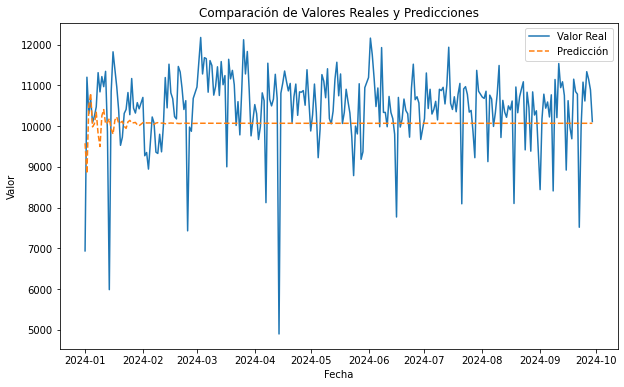

In [36]:
# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
#plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
#plt.xlim(['01-01-2024', '01-06-2024'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

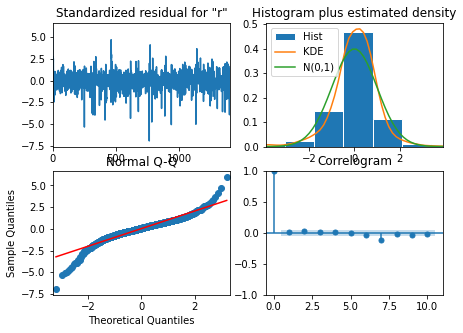

In [37]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(6, 1, 1))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

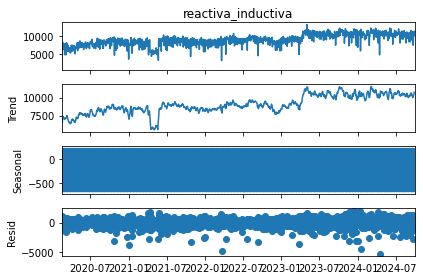

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose


reactiva_inductiva.index = pd.to_datetime(reactiva_inductiva.index)

# Prueba con diferentes periodos para observar la estacionalidad
# Por ejemplo, para detectar estacionalidad semanal (m=7)
decomposition = seasonal_decompose(reactiva_inductiva, model='additive', period=7)
decomposition.plot()
plt.show()

In [39]:
# # grid search ARIMA parameters for time series
# import warnings
# from math import sqrt
# from pandas import read_csv

# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
# 	# prepare training dataset
# 	train_size = int(len(X) * 0.66)
# 	train, test = X[0:train_size], X[train_size:]
# 	history = [x for x in train]
# 	# make predictions
# 	predictions = list()
# 	for t in range(len(test)):
# 		model = ARIMA(history, order=arima_order)
# 		model_fit = model.fit()
# 		yhat = model_fit.forecast()[0]
# 		predictions.append(yhat)
# 		history.append(test[t])
# 	# calculate out of sample error
# 	rmse = sqrt(mean_squared_error(test, predictions))
# 	return rmse
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
# 	dataset = dataset.astype('float32')
# 	best_score, best_cfg = float("inf"), None
# 	for p in p_values:
# 		for d in d_values:
# 			for q in q_values:
# 				order = (p,d,q)
# 				try:
# 					rmse = evaluate_arima_model(dataset, order)
# 					if rmse < best_score:
# 						best_score, best_cfg = rmse, order
# 					print('ARIMA%s RMSE=%.3f' % (order,rmse))
# 				except:
# 					continue
# 	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')

# # evaluate parameters
# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(reactiva_inductiva, p_values, d_values, q_values)

In [57]:
import warnings
from math import sqrt
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed  # Para procesamiento paralelo

# Función para evaluar un modelo ARIMA con auto_arima de pmdarima
def evaluate_arima_model_auto(X, p, d, q):
    # Separar en conjunto de entrenamiento y prueba
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    
    # Ajuste usando auto_arima con búsqueda stepwise
    model = pm.auto_arima(train, start_p=p, start_q=q, d=d,
                          max_p=p, max_q=q,
                          seasonal=False, trace=False,
                          error_action='ignore', 
                          suppress_warnings=True,
                          stepwise=True, maxiter=10)
    
    # Predecir en el conjunto de prueba
    predictions = model.predict(n_periods=len(test))
    mae = mean_absolute_error(test, predictions)
    rmse = sqrt(mean_squared_error(test, predictions))
    return mae, (p, d, q)

# Función para evaluar múltiples combinaciones de p, d, q en paralelo
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    # Usar procesamiento paralelo para probar cada combinación
    results = Parallel(n_jobs=-1)(delayed(evaluate_arima_model_auto)(dataset, p, d, q) 
                                  for p in p_values for d in d_values for q in q_values)
    
    # Evaluar los resultados
    for rmse, order in results:
        if rmse < best_score:
            best_score, best_cfg = rmse, order
        print('ARIMA%s RMSE=%.3f' % (order, rmse))
    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Valores de p, d y q para evaluar
p_values = range(0, 10)
d_values = range(0, 2)
q_values = range(0, 10)
warnings.filterwarnings("ignore")

# Ejecutar la búsqueda de parámetros
evaluate_models(reactiva_inductiva, p_values, d_values, q_values)


/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exceptio

ARIMA(0, 0, 0) RMSE=2140.978
ARIMA(0, 0, 1) RMSE=2137.983
ARIMA(0, 0, 2) RMSE=2135.858
ARIMA(0, 0, 3) RMSE=2128.036
ARIMA(0, 0, 4) RMSE=2126.675
ARIMA(0, 0, 5) RMSE=2126.675
ARIMA(0, 0, 6) RMSE=2118.728
ARIMA(0, 0, 7) RMSE=2115.815
ARIMA(0, 0, 8) RMSE=2112.391
ARIMA(0, 0, 9) RMSE=2111.037
ARIMA(0, 1, 0) RMSE=1160.254
ARIMA(0, 1, 1) RMSE=1547.295
ARIMA(0, 1, 2) RMSE=1540.051
ARIMA(0, 1, 3) RMSE=1540.051
ARIMA(0, 1, 4) RMSE=1491.040
ARIMA(0, 1, 5) RMSE=1481.642
ARIMA(0, 1, 6) RMSE=1478.129
ARIMA(0, 1, 7) RMSE=1355.510
ARIMA(0, 1, 8) RMSE=1507.480
ARIMA(0, 1, 9) RMSE=1507.480
ARIMA(1, 0, 0) RMSE=2138.507
ARIMA(1, 0, 1) RMSE=2570.745
ARIMA(1, 0, 2) RMSE=2570.745
ARIMA(1, 0, 3) RMSE=2115.909
ARIMA(1, 0, 4) RMSE=4695.013
ARIMA(1, 0, 5) RMSE=4202.968
ARIMA(1, 0, 6) RMSE=4552.422
ARIMA(1, 0, 7) RMSE=5337.927
ARIMA(1, 0, 8) RMSE=4599.046
ARIMA(1, 0, 9) RMSE=4388.190
ARIMA(1, 1, 0) RMSE=1630.248
ARIMA(1, 1, 1) RMSE=1549.285
ARIMA(1, 1, 2) RMSE=1540.051
ARIMA(1, 1, 3) RMSE=842.561
ARIMA(1, 1, 4) 

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


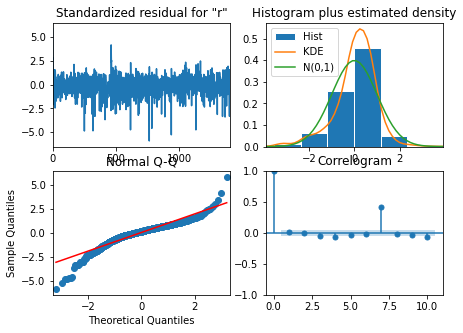

In [58]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(1, 1, 3))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

RMSE: 919.3713885505476
MAE: 637.6055379620346


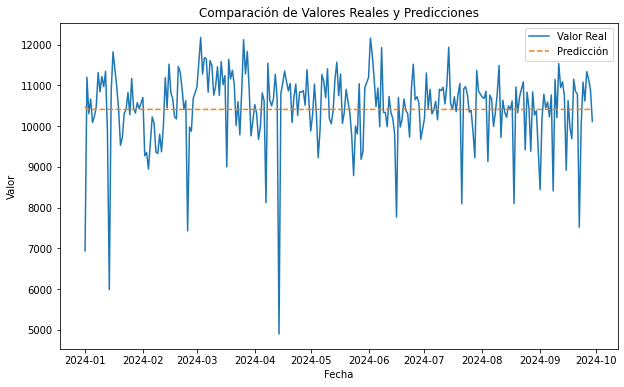

In [59]:
predictions = model_fit.forecast(steps=len(test))
comparison_df = pd.DataFrame({
    'Fecha': test.index,
    'Valor Real': test.values,
    'Predicción': predictions
}).set_index('Fecha')

# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
#plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

In [ ]:
energia

## Deep Learning

In [255]:
train_set = df[:'2023'].iloc[:,3:4].values
test_set = df['2024':].iloc[:,3:4].values

In [256]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [257]:
look_back = 10
X_train, y_train = create_dataset(training_set_scaled, look_back)
print(X_train.shape)
print(y_train.shape)

(1393, 10)
(1393,)


### Grafico completo de serie

In [258]:
import plotly.graph_objects as go

# Definir los datos para el conjunto de entrenamiento y prueba
training_data = df["reactiva_inductiva"][:'2023']
test_data = df["reactiva_inductiva"]['2024':]

# Crear la figura
fig = go.Figure()

# Añadir la serie de datos del conjunto de entrenamiento
fig.add_trace(go.Scatter(
    x=training_data.index,
    y=training_data.values,
    mode='lines',
    name='Training set (Before 2024)'
))

# Añadir la serie de datos del conjunto de prueba
fig.add_trace(go.Scatter(
    x=test_data.index,
    y=test_data.values,
    mode='lines',
    name='Test set (2024 and beyond)'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Energía reactiva inductiva de EPM",
    xaxis_title="Date",
    yaxis_title="Reactiva Inductiva",
    legend=dict(title="Data"),
    width=1000, # Ajustar el ancho en lugar de figsize
    height=400,
    xaxis_rangeslider_visible=True
)

# Mostrar el gráfico
fig.show()

## definiendo

In [259]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=500, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train,epochs=50,batch_size=32)

Epoch 1/50


/home/javier/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0645
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0066
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0071
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0069
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0065
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0069
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0068
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0071
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0066
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0064
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0063
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0068
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0061
Epoch 16/50
44/

## RNN

In [222]:
# The RNN architecture
model = Sequential()
# First RNN layer with Dropout regularisation
model.add(SimpleRNN(units=500,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))

In [223]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 500)            │       251,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,501 (982.43 KB)

 Trainable params: 251,501 (982.43 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
model.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train,epochs=500,batch_size=32)

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3905
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057
Epoch 9/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060
Epoch 10/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 11/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047
Epoch 12/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050
Epoch 13/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054
Epoch 14/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057
Epoch 15/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052
Epoc

In [225]:
df_energia_epm_total = pd.concat((df["reactiva_inductiva"][:'2023'],df["reactiva_inductiva"]['2024':]),axis=0)
inputs = df_energia_epm_total[len(df_energia_epm_total)-len(test_set) - look_back:].values
inputs[np.isnan(inputs)] = df['reactiva_inductiva'].max()
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
inputs.shape

(275, 1)

In [226]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(look_back,inputs.shape[0]):
    X_test.append(inputs[i-look_back:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


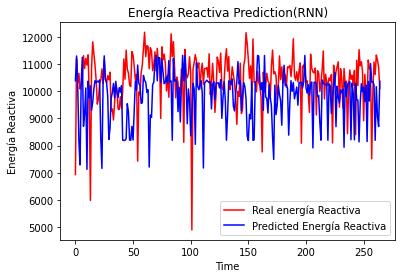

In [227]:
# Visualizing the results
plt.plot(test_set, color='red',label='Real energía Reactiva')
plt.plot(predicted_stock_price, color='blue',label='Predicted Energía Reactiva')
plt.title('Energía Reactiva Prediction(RNN)')
plt.xlabel('Time')
plt.ylabel('Energía Reactiva')
plt.legend()
plt.show()

In [228]:

mae = mean_absolute_error(test_set, predicted_stock_price)
print(f'MAE: {mae}')

mse = mean_squared_error(test_set, predicted_stock_price)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

MSLE = np.mean((np.log1p(test_set) - np.log1p(predicted_stock_price))**2)
print(f'MSLE: {MSLE}')

r2 = r2_score(test_set, predicted_stock_price)
print(f'R2: {r2}')

#r1 = stats.pearsonr(test_set, predicted_stock_price)
#print(f'Pearson: {r1}')

mape = np.mean(np.abs((test_set - predicted_stock_price) / test_set)) * 100
print(f'MAPE: {mape}')

medae = np.median(np.abs(test_set - predicted_stock_price))
print(f'MedAE: {medae}')

max_error = np.max(np.abs(test_set - predicted_stock_price))
print(f'Max Error: {max_error}')

explained_variance = r2_score(test_set, predicted_stock_price)
print(f'Explained Variance: {explained_variance}')

MAE: 1114.9686279296875
RMSE: 1476.5110903748741
MSLE: 0.024720655754208565
R2: 1.0
MAPE: 10.959158092737198
MedAE: 803.072265625
Max Error: 4320.5302734375
Explained Variance: 1.0


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square

/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square



In [229]:
# Evaluating our model

mae = mean_absolute_error(test_set, predicted_stock_price)
print(f'Mean Absolute Error: {mae}')



rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))
r2 = math.sqrt(r2_score(test_set, predicted_stock_price))
print("The r2 score is {}.".format(r2))

Mean Absolute Error: 1114.9686279296875
The root mean squared error is 1476.5110903748741.
The r2 score is 1.0.


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square



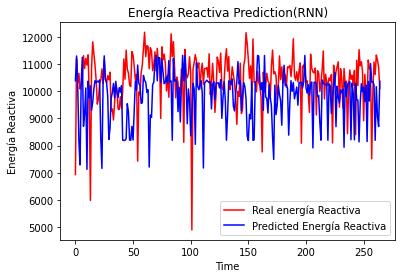

In [230]:
# Visualizing the results
plt.plot(test_set, color='red',label='Real energía Reactiva')
plt.plot(predicted_stock_price, color='blue',label='Predicted Energía Reactiva')
plt.title('Energía Reactiva Prediction(RNN)')
plt.xlabel('Time')
plt.ylabel('Energía Reactiva')
plt.legend()
plt.show()

## LSTM

In [231]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=500, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1))

/home/javier/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [232]:
regressor.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 500)            │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,004,501 (3.83 MB)

 Trainable params: 1,004,501 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [237]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=1000, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train,epochs=500,batch_size=32)

/home/javier/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0759
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0070
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0067
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0063
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0061
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0066
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0070
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0055
Epoch 9/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0067
Epoch 10/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0060
Epoch 11/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0058
Epoch 12/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0065
Epoch 13/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0064
Epoch 14/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0066
Epoch 15/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - lo

In [233]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


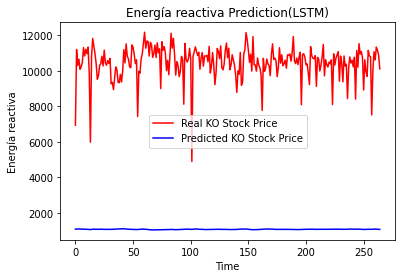

In [236]:
# Visualizing the results
plt.plot(test_set, color='red',label='Real KO Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted KO Stock Price')
plt.title('Energía reactiva Prediction(LSTM)')
plt.xlabel('Time')
plt.ylabel('Energía reactiva')
plt.legend()
plt.show()

In [235]:
# Evaluating our model
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(rmse))

r2 = math.sqrt(r2_score(test_set, predicted_stock_price))
print("The r2 score is {}.".format(r2))

The root mean squared error is 9448.031752698547.
The r2 score is 1.0.


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square



In [267]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the series to a 2D array for scaling
values = reactiva_inductiva.values.reshape(-1, 1)

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# Define a function to create sequences for LSTM input
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences with a sequence length of 30 days (approximately one month)
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Reshape X for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

history.history

Epoch 1/20


/home/javier/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1031 - val_loss: 0.0071
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0067
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - val_loss: 0.0067
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - val_loss: 0.0069
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0070
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0067
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0069
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0068
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0069
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0070
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0068


{'loss': [0.045786723494529724,
  0.005047779530286789,
  0.00503647280856967,
  0.005037958733737469,
  0.005052621476352215,
  0.0050449008122086525,
  0.005004198290407658,
  0.005073167849332094,
  0.005014417227357626,
  0.00500083714723587,
  0.005050065461546183,
  0.005033955443650484,
  0.0052932980470359325,
  0.005134958308190107,
  0.005020297598093748,
  0.005005013197660446,
  0.005007558036595583,
  0.005069168750196695,
  0.004955419339239597,
  0.005037239287048578],
 'val_loss': [0.007142717018723488,
  0.006729289423674345,
  0.0067128525115549564,
  0.0069226971827447414,
  0.0069974130019545555,
  0.00673629529774189,
  0.006737726274877787,
  0.006933822762221098,
  0.0067507196217775345,
  0.006888115778565407,
  0.006981696933507919,
  0.006840158719569445,
  0.006801685318350792,
  0.0068321567960083485,
  0.006748448126018047,
  0.007157486397773027,
  0.006862853188067675,
  0.007373137399554253,
  0.006788903847336769,
  0.006981569807976484]}

In [268]:
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error,
    mean_absolute_percentage_error, median_absolute_error, max_error, explained_variance_score
)

# Obtener las predicciones en el conjunto de validación
predictions = model.predict(X_val)

# Invertir el escalado para obtener valores reales
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
predictions_actual = scaler.inverse_transform(predictions).flatten()

# Calcular las métricas
r2 = r2_score(y_val_actual, predictions_actual)
mae = mean_absolute_error(y_val_actual, predictions_actual)
mse = mean_squared_error(y_val_actual, predictions_actual)
msle = mean_squared_log_error(y_val_actual, predictions_actual)
mape = mean_absolute_percentage_error(y_val_actual, predictions_actual)
medae = median_absolute_error(y_val_actual, predictions_actual)
max_err = max_error(y_val_actual, predictions_actual)
explained_variance = explained_variance_score(y_val_actual, predictions_actual)

# Imprimir las métricas
metrics = {
    "R2": r2,
    "MAE": mae,
    "MSE": mse,
    "MSLE": msle,
    "MAPE": mape,
    "MedAE": medae,
    "Max Error": max_err,
    "Explained Variance": explained_variance
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 1.0
MAE: 718.4363403320312
MSE: 959719.3125
MSLE: 0.010893565602600574
MAPE: 0.07347860932350159
MedAE: 567.95947265625
Max Error: 5482.125
Explained Variance: 1.0


/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning:

overflow encountered in square

/home/javier/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1028: RuntimeWarning:

overflow encountered in square

